# 簡単な非線形ダイナミクス
通常、物理現象はなんらかの外力や外場に対して線形に応答すると近似されることが多いです。電気伝導のオームの法則しかり、熱伝導のフーリエの法則しかり。そこまで急峻な外場や、特殊な状態でないかぎり、この線形の近似は妥当であり、かつ計算上も便利です。

その一方で、非線形な方程式にしたがう系の時間発展は、予想もつかないカオスな振る舞いをしたり、いわゆる「複雑系」のベースになっており、これもまた魅力的です。非線形方程式のダイナミクスは、生物から物理、経済に至るまで、色々なところで現れてくるので、pythonを使って実際に計算したり、可視化したりしてみましょう。

## 個体数のダイナミクスとロジスティック写像
非線形ダイナミクスの入門例としてよく取り上げられるのが、昆虫の大発生の問題です。イナゴの大群、素数ゼミ etc…のようなニュースを聞いたことがあるでしょう。

昆虫が増える過程のシミュレーションをしようとしたときに、どういった前提条件でどういった方程式を立てればよいでしょうか？

まず、生物の繁殖を考えるときは、世代で考えることが多いので、ある一定の寿命$\Delta t$をもった世代ごとの個体数を追跡する形で離散化することが妥当でしょう。

各世代での増加する過程については、単純化すると以下のような条件を満たすべきだと考えられます

１）ある世代iで増える個体数 $\Delta N_i$ はその時点での個体数$N_i$に比例する 

２）個体数には最大値$N_*$がある

１）の条件は
$\frac{\Delta N_i}{\Delta t}=\lambda N_i$
という風に書けます。$\lambda$は比例係数です

２）の条件は増加率$\lambda$が個体数が$N*$に近づくにつれ、頭打ちになるようにしてやれば導入することができます。これは
$\lambda \rightarrow \lambda'(N_*-N_i)$
と置き直せば実現できます

これらを用いると、１世代あとの個体数$N_{i+1}$の式として

$$
N_{i+1}=N_i+\Delta N_i =N_i+\lambda'\Delta t(N_*-N_i)N_i \\
=N_i+(1+\lambda'\Delta t N_*)(1-\frac{\lambda' \Delta t}{1+\lambda' \Delta t N_*}N_i)
$$

が得られます。この関係式がどうやって得られるかは以下の模式図を見れば納得できるでしょう



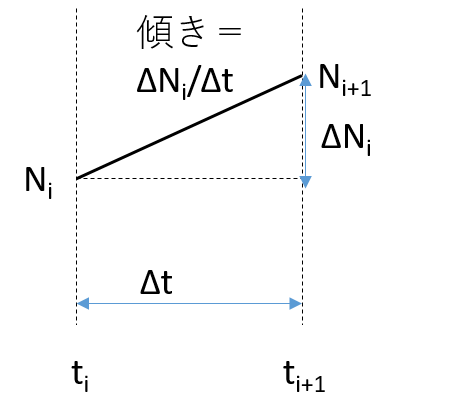

In [2]:
from IPython.display import Image
Image("./img/LogisticMap-1.png")

少しの近似と、ややこしい部分の書き換えを行うと、これはもっと簡単な漸化式の形に落ち着きます。

$$
\mu=1+\lambda' \Delta t N_*
$$

とし、さらに

$$
\frac{\lambda' \Delta t N_i}{1+\lambda' \Delta t N_*}\sim \frac{N_i}{N_*}
$$

の近似を行い、新たに$\frac{N_i}{N_*}=x_i$と置き直しましょう

すると個体数の式は

$$
x_{i+1}=\mu x_i(1-x_i)
$$

のようなシンプルな形になります

これはとても単純に見えますが、実はその振る舞いは意外に奥深く、パラメーター$\mu$の値をどう取るかで個体数の時間発展が大きく変わってきます。さらにその背後にはカオスの存在が見えてきます。このようにシンプルでありながら色々な側面を見せるこの式は「ロジスティック写像」と呼ばれています

## ロジスティック写像の数値計算

ロジスティック写像の面白いふるまいを目で見て確認するために実際にpythonでプログラムを書いて、個体数のシミュレーションを行ってみましょう。

シミュレーションを行う前に、まず、ロジスティック写像の初期値や、増加率$\mu$としてどのような値の範囲を取りうるかを考えておく必要があります。

式の形から、ロジスティック写像は$0<x_i<1$で最大値$\mu/4$をとる放物線がベースになっていることがわかります。
($x_i$の定義は最大の個体数とその世代の個体数の比ですから、１を超えない前提があるのはわかりますね)

$x_{i+1}$が同じ\[0,1\]の区間に戻るようにするためには、$0<\mu<4$である必要があります

ひとまず、$x_i$の初期値は0.1として、$\mu$をこの範囲で様々に振ってみましょう

50世代に渡る個体数を$\mu=0.4$で計算し、プロットするサンプルが以下のものです。
どのような結果が出るでしょうか？

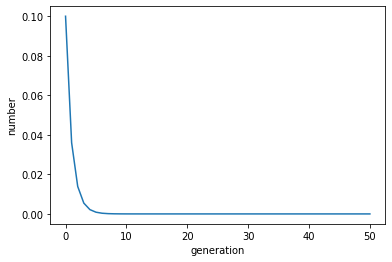

In [3]:
import matplotlib.pyplot as plt
y=[]

yinit=0.1
mu=0.4
y.append(yinit)
yold=yinit
for i in range(50):
    ynew=mu*yold*(1.0-yold)
    y.append(ynew)
    yold=ynew

plt.xlabel("generation")
plt.ylabel("number")
plt.plot(y)
plt.show()